In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
image = cv2.imread("cat1.jpeg", cv2.IMREAD_GRAYSCALE)

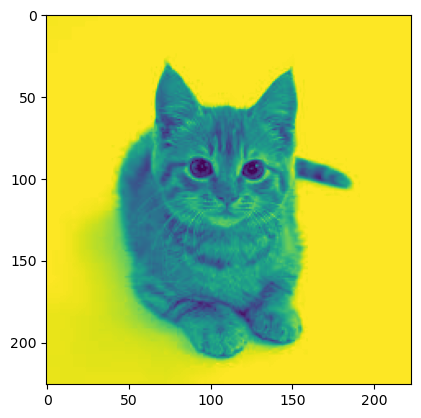

In [4]:
plt.imshow(image)

# Define denoisers 

In [5]:

def gaussian_denoise(img, ksize):
    return cv2.GaussianBlur(img, (ksize, ksize), 0)

def non_local_means_denoise(img, strength=10):
    return cv2.fastNlMeansDenoising(img, None, strength, 7, 21)


def calculate_residual(original, denoised):
    return cv2.subtract(original, denoised)

In [6]:

ksizes = [3, 5, 9, 15]  
strengths = [5, 10, 15, 20] 
denoised_images = []
residuals = []

# Perform multi-scale denoising and calculate residuals

In [7]:

for k in ksizes:
    denoised_img = gaussian_denoise(image, k)
    residual = calculate_residual(image, denoised_img)
    
    denoised_images.append(denoised_img)
    residuals.append(residual)

# Plot original image, denoised images, and residuals

In [8]:

def plot_images(parameter_list=ksizes, parameter_name="kernel"):
    plt.figure(figsize=(12, 6))
    plt.subplot(2, len(ksizes)+1, 1)
    plt.imshow(image)
    plt.title("Original Image")
    plt.axis('off')

    for i in range(len(ksizes)):
        plt.subplot(2, len(ksizes)+1, i+2)
        plt.imshow(denoised_images[i])
        plt.title(f"Denoised (k={ksizes[i]})")
        plt.axis('off')

        plt.subplot(2, len(ksizes)+1, i+len(ksizes)+2)
        plt.imshow(residuals[i])
        plt.title(f"Residual ({parameter_name}={ksizes[i]})")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

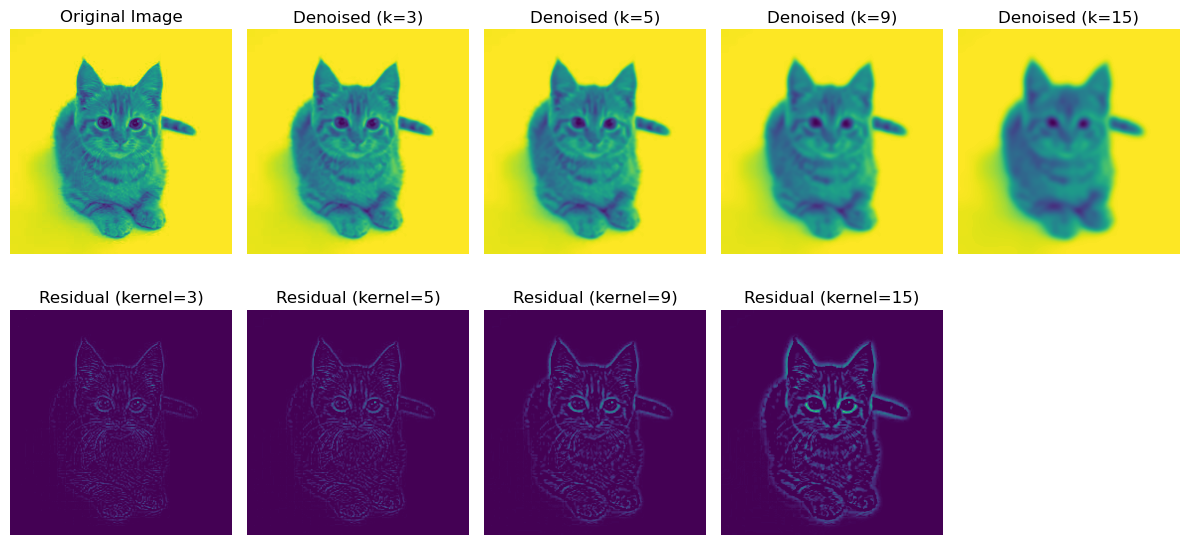

In [9]:
plot_images(ksizes)

# Getting back the original image
At any point, combining the residual and the denoised image should give us the original image, or close to it.

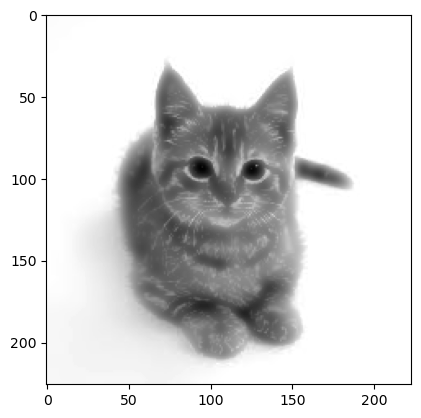

In [10]:
plt.imshow(residuals[3]+denoised_images[3], cmap='gray')

In [11]:
denoised_images = []
residuals = []

# Using multiple denoisers sequentially

We can see that in addition to edges, this time the textures are captured in the residuals as expected
from using  Non-Local Means Denoising which captures patches of image instead of individual pixels. 
 

In [12]:
for k, s in zip(ksizes, strengths):
    denoised_img = gaussian_denoise(image, k)
    denoised_img = non_local_means_denoise(denoised_img, strength=s)
    residual = calculate_residual(image, denoised_img)
    
    denoised_images.append(denoised_img)
    residuals.append(residual)

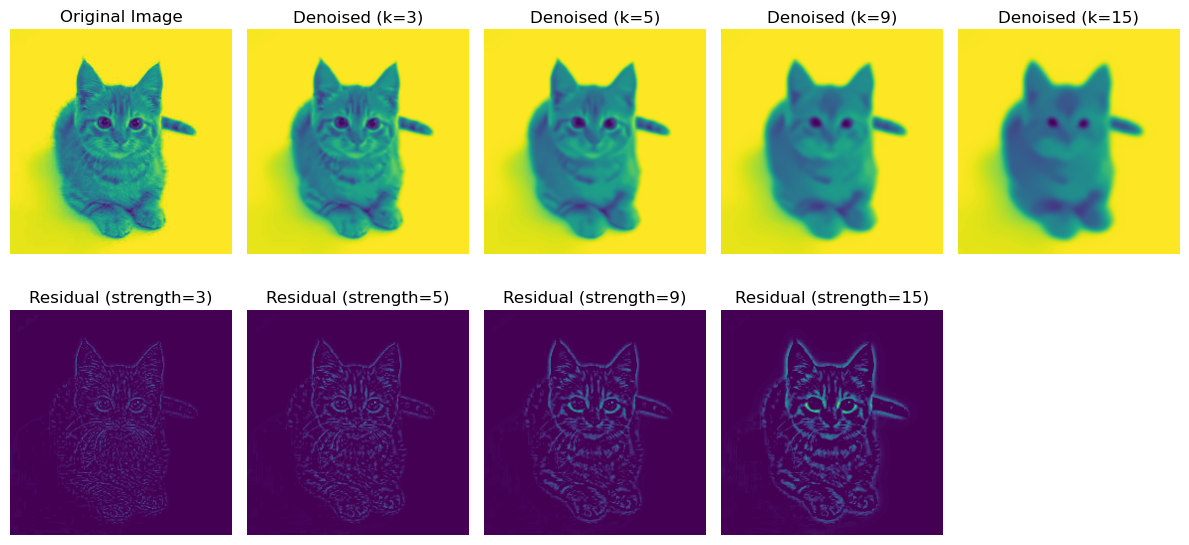

In [13]:
plot_images(strengths, parameter_name="strength")